In [1]:
import pandas as pd

In [2]:
df_purchase = pd.read_csv("User_product_purchase_details_p2.csv")
df_user = pd.read_csv("user_demographics.csv")
df = pd.merge(df_purchase, df_user, on = "User_ID", how = "left")

In [3]:
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(["Product_ID"], axis=1)
df = df.fillna(0)
df = pd.get_dummies(df, drop_first=True)

In [5]:
X = df.drop(["High_Value_Purchase", "Purchase"], axis=1)
y = df["High_Value_Purchase"]
X.head()

,User_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,0,3,0.0,0.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False
1,1000001,0,1,6.0,14.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False
2,1000001,0,12,0.0,0.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False
3,1000001,0,12,14.0,0.0,10,False,False,False,True,False,False,False,False,False,False,False,False,False
4,1000002,0,8,0.0,0.0,16,False,True,False,False,False,True,True,False,False,False,False,False,True


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7659207010016907
Confusion Matrix:
[[64762  7578]
 [18174 19500]]


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_dt_pred = dt_model.predict(x_test)        
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}") 

Decision Tree Accuracy: 0.8723162506590071


In [9]:
from tensorflow.keras import models, layers
nn_model = models.Sequential([layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
                              layers.Dense(32, activation='relu'),
                              layers.Dense(1, activation='sigmoid')])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=20, batch_size=32,)
nn_loss, nn_accuracy = nn_model.evaluate(x_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy}")

Epoch 1/20


c:\Users\User\11th nov\.env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 798us/step - accuracy: 0.8423 - loss: 0.3694
Epoch 2/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 10s 753us/step - accuracy: 0.8829 - loss: 0.2912
Epoch 3/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 765us/step - accuracy: 0.8865 - loss: 0.2827
Epoch 4/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 10s 703us/step - accuracy: 0.8912 - loss: 0.2712
Epoch 5/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 10s 695us/step - accuracy: 0.8948 - loss: 0.2634
Epoch 6/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 786us/step - accuracy: 0.8956 - loss: 0.2606
Epoch 7/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 821us/step - accuracy: 0.8961 - loss: 0.2595
Epoch 8/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 10s 733us/step - accuracy: 0.8960 - loss: 0.2587
Epoch 9/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 766us/step - accuracy: 0.8963 - loss: 0.2584
Epoch 10/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 774us/step - accuracy: 0.8961 - loss: 0.2576
Epoch 11/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 10s 720us/step - accuracy: 0.8965 -

In [10]:
print("Accuracy of Logistic Regression:", accuracy)
print("Accuracy of Decision Tree:", dt_accuracy)
print("Accuracy of Neural Network:", nn_accuracy)

Accuracy of Logistic Regression: 0.7659207010016907
Accuracy of Decision Tree: 0.8723162506590071
Accuracy of Neural Network: 0.8953315019607544


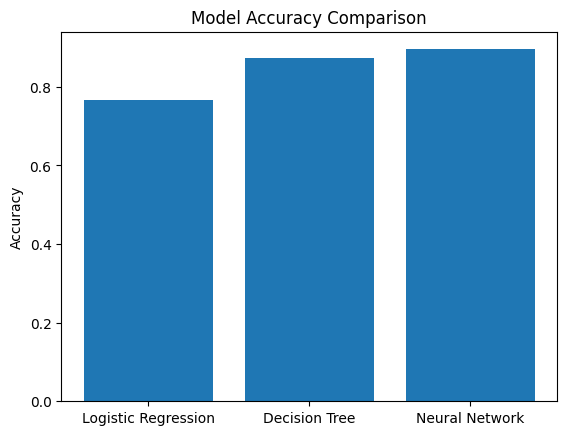

In [11]:
import matplotlib.pyplot as plt
plt.bar(['Logistic Regression', 'Decision Tree', 'Neural Network'], [accuracy, dt_accuracy, nn_accuracy])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')      
plt.show()

In [13]:
from sklearn.metrics import precision_score, classification_report

lr_precision = precision_score(y_test, y_pred, zero_division=0)
print("Logistic Regression precision:", lr_precision)

dt_precision = precision_score(y_test, y_dt_pred, zero_division=0)
print("Decision Tree precision:", dt_precision)

nn_probs = nn_model.predict(x_test, verbose=0).ravel()
nn_pred = (nn_probs >= 0.5).astype(int)
nn_precision = precision_score(y_test, nn_pred, zero_division=0)
print("Neural Network precision:", nn_precision)

print("\nLogistic Regression report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Decision Tree report:\n", classification_report(y_test, y_dt_pred, zero_division=0))
print("Neural Network report:\n", classification_report(y_test, nn_pred, zero_division=0))


Logistic Regression precision: 0.7201418125415466
Decision Tree precision: 0.8237373598969608
Neural Network precision: 0.7936771672990997

Logistic Regression report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83     72340
           1       0.72      0.52      0.60     37674

    accuracy                           0.77    110014
   macro avg       0.75      0.71      0.72    110014
weighted avg       0.76      0.77      0.75    110014

Decision Tree report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     72340
           1       0.82      0.80      0.81     37674

    accuracy                           0.87    110014
   macro avg       0.86      0.85      0.86    110014
weighted avg       0.87      0.87      0.87    110014

Neural Network report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92     72340
           1       0.